In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

import matplotlib.dates as mdates

In [2]:
# Lade CSV aus Ordner -> komplette Dashboard Datei
df = pd.read_csv('dashboard_time_series_complete.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158424 entries, 0 to 158423
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           158424 non-null  int64  
 1   Date                 158424 non-null  object 
 2   Country              158424 non-null  object 
 3   Confirmed_Cases      158424 non-null  int64  
 4   Deaths               158424 non-null  int64  
 5   New_Cases            158424 non-null  int64  
 6   New_Deaths           158424 non-null  int64  
 7   Doses_admin          158424 non-null  float64
 8   GDP                  158424 non-null  float64
 9   Population           158424 non-null  int64  
 10  Confirmed_Cases_rel  158424 non-null  float64
 11  Deaths_rel           158424 non-null  float64
 12  Doses_admin_per_100  158424 non-null  float64
 13  GDP_pro_Kopf         158424 non-null  float64
 14  GNI_2019             158424 non-null  float64
 15  Income group     

In [4]:
# Number of countries
df['Country'].nunique()

184

### Thesen Scatterplot (mit Todesfälle)
#### - Länder mit hohem GDP_pro_Kopf haben mehr Impfdosen verabreicht
#### - es gibt auch viele Länder mit geringem GDP_pro_Kopf, die viele Impfdosen verabreichen konnten
#### - viele Todesfälle ehr in reichen Ländern -> Werden die Toten in armen Ländern nicht identifiziert??

### Thesen Scatterplot (mit Corona-Fällen)
#### - reiche Länder haben mehr Fälle (weil mehr Testungen?? -> keine weltweiten Daten zu Testungen)
#### - arme Länder haben ehr weniger Impfdosen verimpft

Text(0.5, 1.0, 'Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Tote')

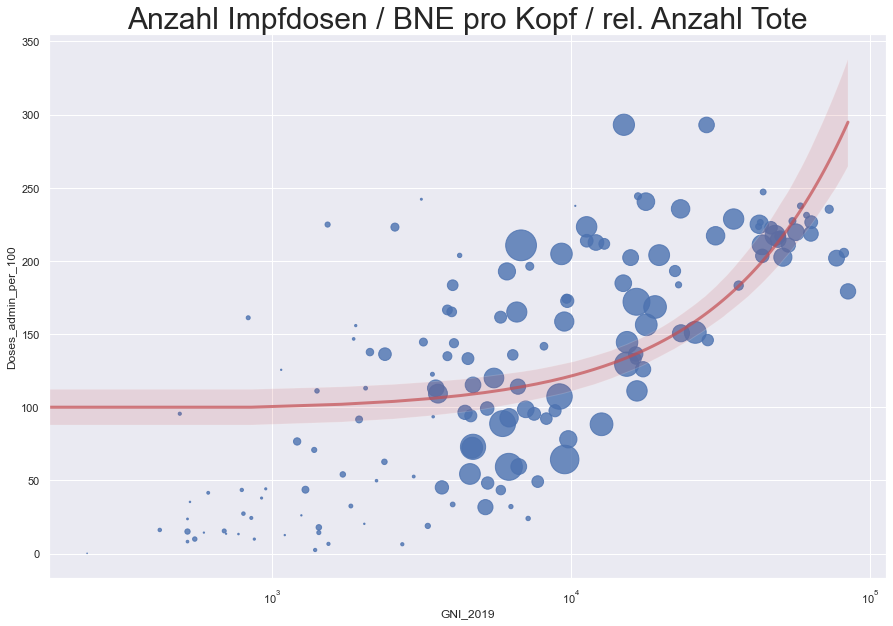

In [5]:
fig = plt.gcf()

# aktuellstes Datum bekommen
date_max = df['Date'].max()

# Change seaborn plot size
fig.set_size_inches(15, 10)

# Filter -> zeige nur alle Daten vom letzten Datum
data_scatter = df[df['Date'] == date_max]

# Filter -> alle Werte "Doses_admin_per_100" größer als 0
data_scatter = data_scatter[data_scatter['Doses_admin_per_100'] > 0]

splot = sns.regplot(x=data_scatter["GNI_2019"], y=data_scatter["Doses_admin_per_100"], 
                    fit_reg=True, marker='o', scatter_kws={'s':data_scatter["Deaths_rel"]*1500},
                   line_kws={"color":"r","alpha":0.7,"lw":3})
splot.set(xscale="log")
splot.set_title('Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Tote',fontsize = 30)

Text(0.5, 1.0, 'Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Covid-Fälle')

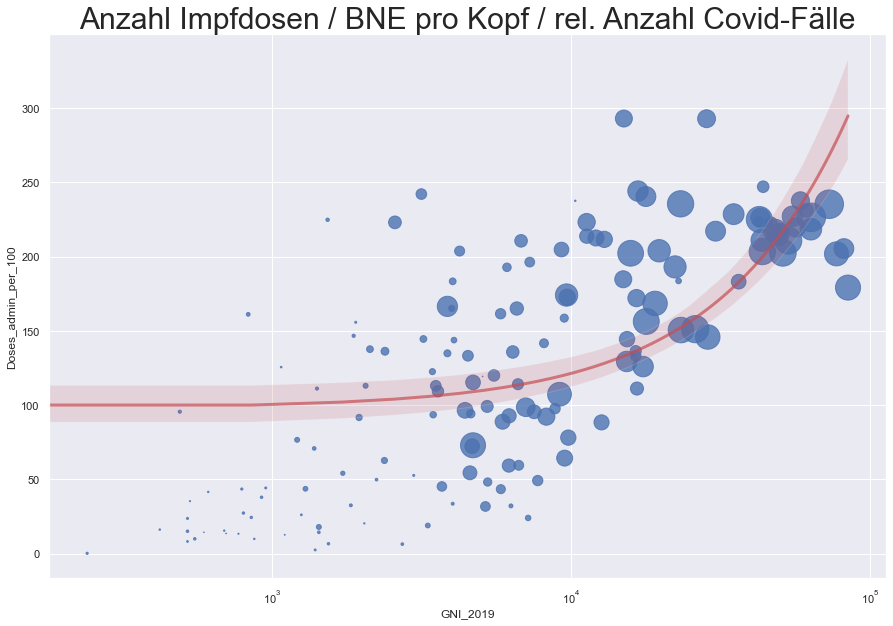

In [6]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 10)

# Filter -> zeige nur alle Daten vom letzten Datum
data_scatter = df[df['Date'] == date_max]

# Filter -> alle Werte "Doses_admin_per_100" größer als 0
data_scatter = data_scatter[data_scatter['Doses_admin_per_100'] > 0]

splot = sns.regplot(x=data_scatter["GNI_2019"], y=data_scatter["Doses_admin_per_100"], 
                    fit_reg=True, scatter_kws={'s':data_scatter["Confirmed_Cases_rel"]*15},
                   line_kws={"color":"r","alpha":0.7,"lw":3})
splot.set(xscale="log")
splot.set_title('Anzahl Impfdosen / BNE pro Kopf / rel. Anzahl Covid-Fälle',fontsize = 30)

In [7]:
data_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 158240 to 158423
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           178 non-null    int64  
 1   Date                 178 non-null    object 
 2   Country              178 non-null    object 
 3   Confirmed_Cases      178 non-null    int64  
 4   Deaths               178 non-null    int64  
 5   New_Cases            178 non-null    int64  
 6   New_Deaths           178 non-null    int64  
 7   Doses_admin          178 non-null    float64
 8   GDP                  178 non-null    float64
 9   Population           178 non-null    int64  
 10  Confirmed_Cases_rel  178 non-null    float64
 11  Deaths_rel           178 non-null    float64
 12  Doses_admin_per_100  178 non-null    float64
 13  GDP_pro_Kopf         178 non-null    float64
 14  GNI_2019             178 non-null    float64
 15  Income group         178 non-nul